# Démonstration de notre programme

Cet IPython notebook permet de visualiser les résultats de notre programme qui résoud le problème d'orthogonal packing.

Notre notebook fonctionne comme ceci : il lit les fichiers d'entrée, appelle notre programme, lui passe l'entrée dans `stdin` et lit le résultat dans `stdout`. Ensuite, nous utilisons ces entrées et sorties pour dessiner le résultat à l'aide de la librairie Python `matplotlib` ainsi que quelques routines que nous avons définies dans le fichier `lib.py`

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)
import subprocess

from lib import call, show_solution, show_solution_swap, show_solution_3D

Populating the interactive namespace from numpy and matplotlib


# Légende


Le rectangle gris est le grand rectangle dans lequel doivent être les petits rectangles.

Les petits rectangles sont dessinés en rouge avec une trensparence de 0.5 pour qu'on puisse voir les supperposition si il y en a.

Les petits rectangles ont aussi leur numéro dans le coin inférieur droit.

Voici un exemple (écrit à la main) dont deux rectangles (le 1 et 2) sont supperposés et donc un autre (le 3) sort du grand rectangle.

De plus, nous avons affiché en bas de chaque graphique le temps mis pour résoudre le problème **ainsi** que pour générer le graphique

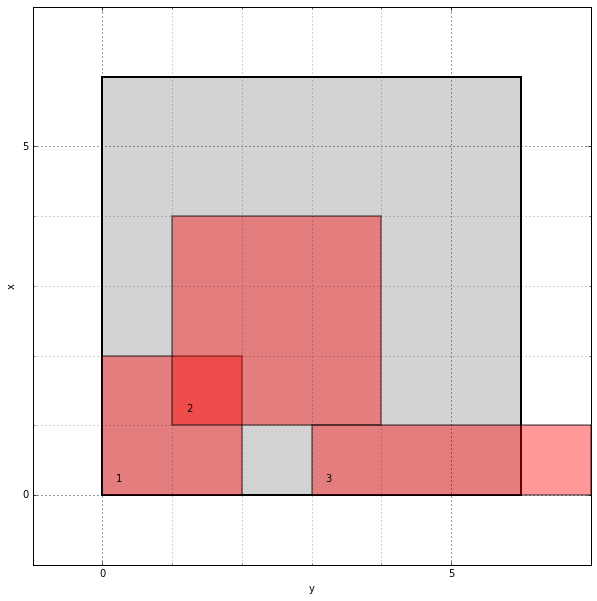

In [3]:
show_solution(open("bad_in.txt").read().strip().split("\n"), open("bad_out.txt").read().strip().split("\n"))

# Cas de base

## Exemple 2
Voici la résolution du cas d'exemple 2.

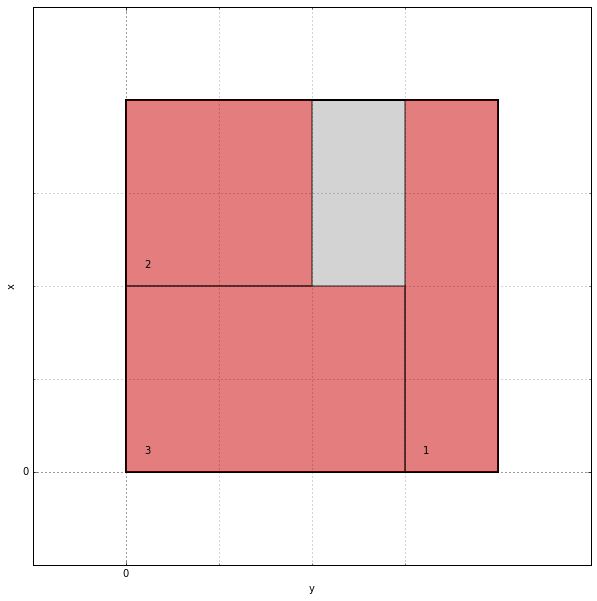

CPU times: user 238 ms, sys: 252 ms, total: 490 ms
Wall time: 210 ms


In [4]:
%%time
show_solution(*call("../data/datas", "-2"))

## Exemple 1
Voici l'exemple 1 qui est insoluble :
(Une execpetion Python est lancée car notre programme finit avec un code de retour de 42 dans le cas ou aucune solution n'est trouvée)

In [5]:
%%time
try:
    call("../data/impossible", "-2")
except subprocess.CalledProcessError as e:
    print("No solution foud")
    print("Error : " + str(e))
    print("\n")

No solution foud
Error : Command '['../solver', '-2']' returned non-zero exit status 42


CPU times: user 3.05 ms, sys: 4.04 ms, total: 7.09 ms
Wall time: 6.5 ms


## BENG06

Nous avons aussi testé notre algorithme avec le fichier d'entrée BENG06.TXT

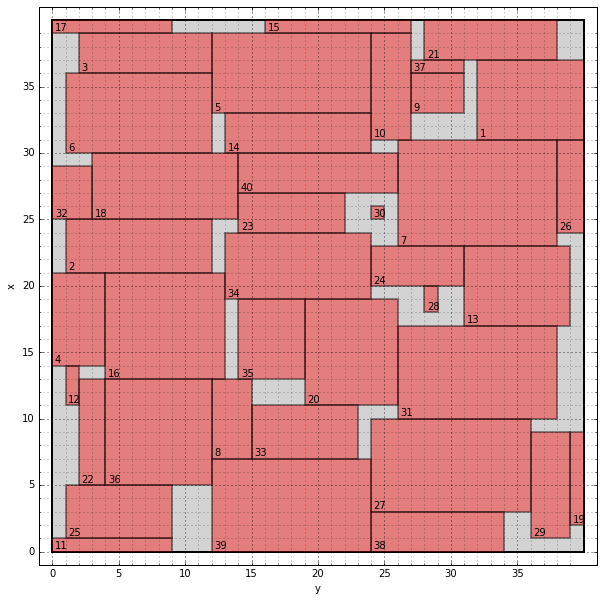

CPU times: user 648 ms, sys: 356 ms, total: 1 s
Wall time: 1.95 s


In [6]:
%%time
show_solution(*call("../data/BENG06.TXT", "-2"))

# Question 4 : plus petit carré admettant une solution

Trouver le plus petit carré pouvant contenir un ensemble de rectangles.

In [7]:
%%time
f = "../data/impossible"
inp, out = call(f, "-s")
print("Le plus petit carré admettant une solution pour %s est de largeur %i\n" % (f, int(out[0])))

Le plus petit carré admettant une solution pour ../data/impossible est de largeur 5

CPU times: user 2.18 ms, sys: 1.1 ms, total: 3.28 ms
Wall time: 6.98 ms


Nous pouvons afficher ce que donnerait un carré de largeur 5 pour ce même problème :

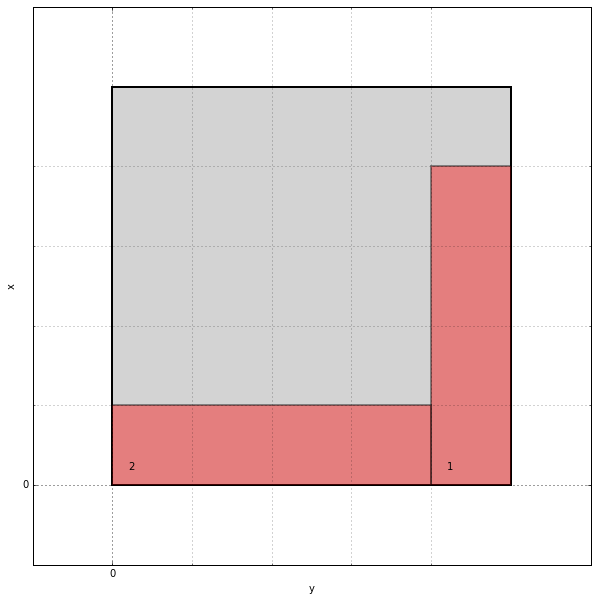

CPU times: user 244 ms, sys: 265 ms, total: 509 ms
Wall time: 210 ms


In [8]:
%%time
show_solution(*call("../data/impossible-square-5", "-2"))

# Question 5 : plus petit carré contenant les carrés $r_i$ à $r_n$

Essayons ici pour $n=10$

In [9]:
%%time
k = 10
inp, out = call("/dev/null", "-n %i" % k)
res = int(out[0])
print("Le plus petit carré admettant une solution pour n=%i est de largeur %i\n" % (k, res))

Le plus petit carré admettant une solution pour n=10 est de largeur 21

CPU times: user 1.17 ms, sys: 4.48 ms, total: 5.65 ms
Wall time: 13.5 s


Nous pouvons donc afficher le résultat :

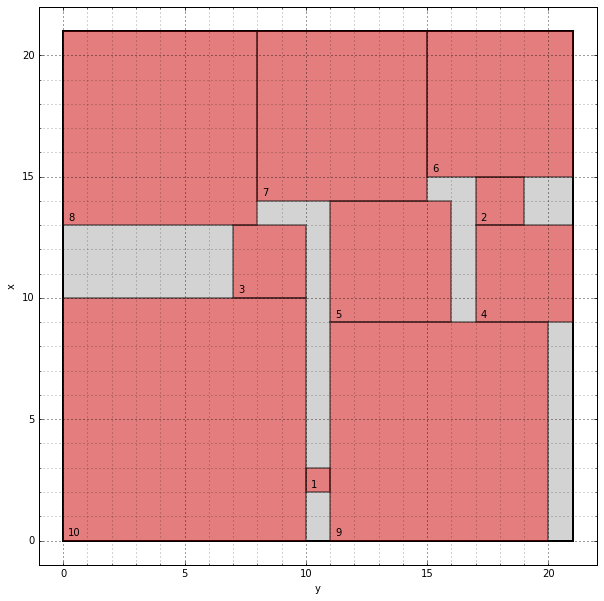

In [10]:
import tempfile
tmp = tempfile.NamedTemporaryFile(delete=False)
squares = ["%i %i %i" % (i,i, i) for i in range(1, k+1)]
with open(tmp.name, "w") as f:
    f.write(("\n".join([str(k), str(res), str(res)] + squares)).strip())

show_solution(*call(tmp.name, "-2"))

# Question 6 : ajouter la 3D

Nous avons généré un exemple facile à visualiser et en voici la solution

N'ayant pas de moyen facile de visualiser de la 3D (surtout pour voir à l'intérieur des solides), nous avons décidé d'afficher les solides couche par couche.

In [11]:
# Fichier d'entrée
!cat ../data/3D

4
3
3
3
1 1 3 3
2 2 2 2
3 2 1 2
4 1 2 1


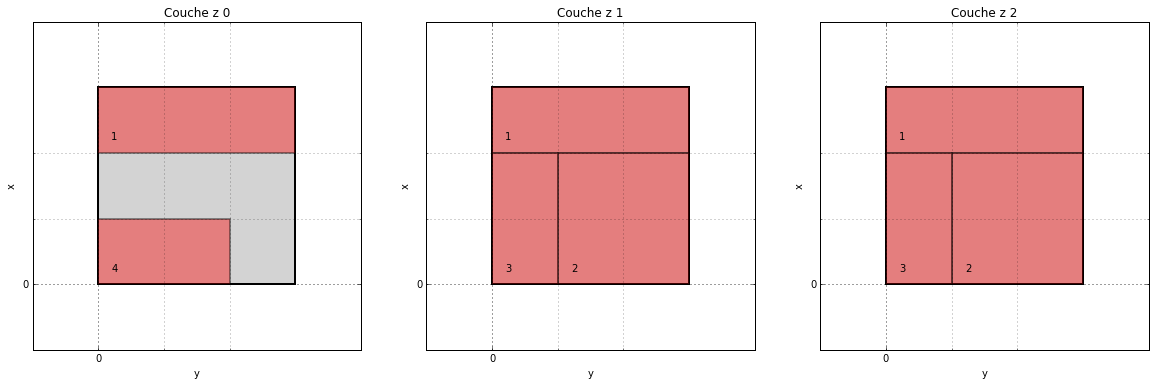

CPU times: user 450 ms, sys: 408 ms, total: 858 ms
Wall time: 411 ms


In [12]:
%%time
show_solution_3D(*call("../data/3D", "-3"))

# Question 7 : flottaison

Pour la flottaison, nous avons utilisé le même exemple qu'à la question 6 et voici le résultat.

On y voit que les couches inférieures sont pleines pour permettre de supporter les couches supérieures (à l'inverse de la question 6)

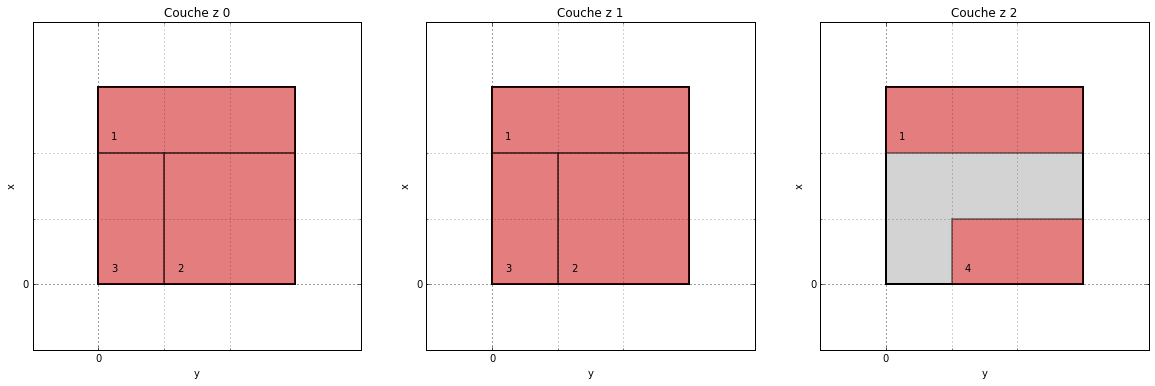

CPU times: user 492 ms, sys: 489 ms, total: 980 ms
Wall time: 443 ms


In [13]:
%%time
show_solution_3D(*call("../data/3D", "-f"))

# Question 8 : retournement


Nous avons utilisé l'exemple 1 (qui est insoluble sans retournement)

Les blocs en bleu sont ceux qui ont été retournés.

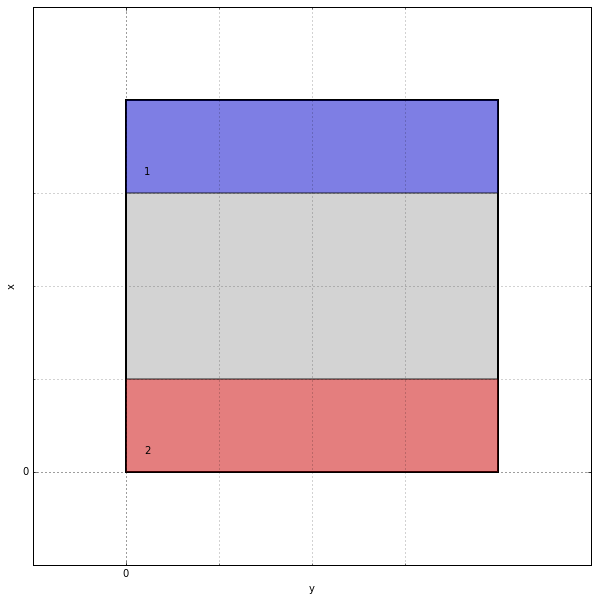

CPU times: user 266 ms, sys: 275 ms, total: 541 ms
Wall time: 226 ms


In [14]:
%%time
show_solution_swap(*call("../data/impossible", "-r"))

L'exemple BENG06 peut aussi être utilisé (même si il reste possible sans retournement)

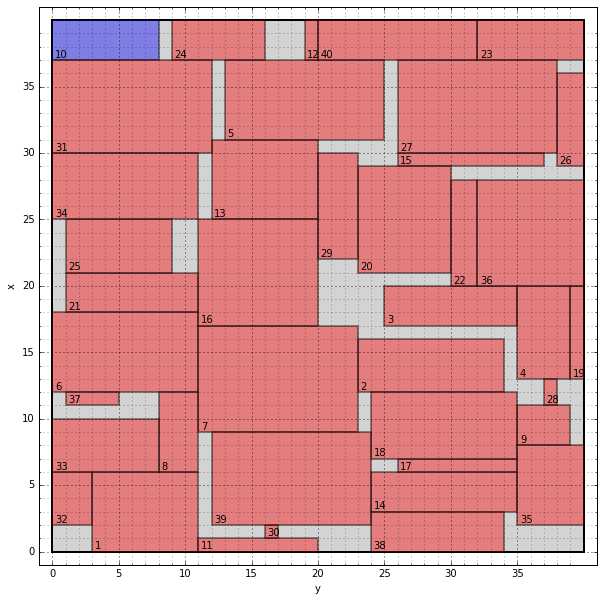

CPU times: user 635 ms, sys: 398 ms, total: 1.03 s
Wall time: 3.56 s


In [15]:
%%time
show_solution_swap(*call("../data/BENG06.TXT", "-r"))

# Question 9 : minimum d'unités de contact

Pour cette question, nous avons aussi créé un exemple qui visualise bien le problème dont voici la solution si on ne met pas de contrainte de contact :

In [16]:
# Fichier d'entrée
!cat ../data/bord

4
4
4
1 1 3
2 1 3
3 2 1
4 2 1


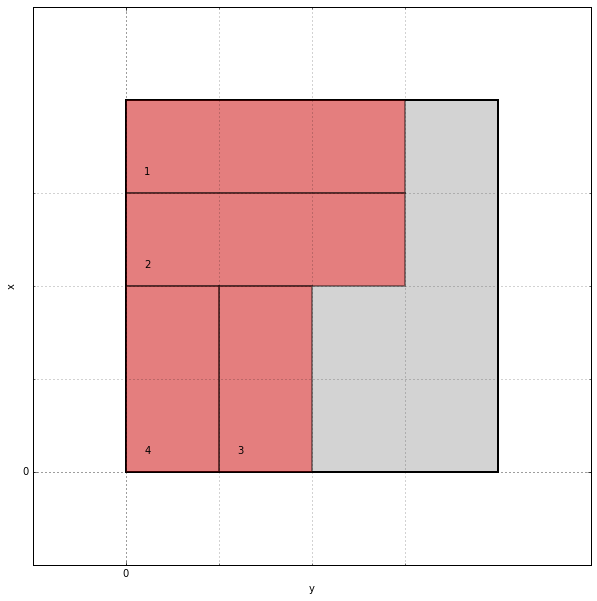

CPU times: user 288 ms, sys: 276 ms, total: 564 ms
Wall time: 270 ms


In [17]:
%%time
show_solution(*call("../data/bord", "-2"))

## Minimum 10
Voici le même exemple avec un contact minimum de 10

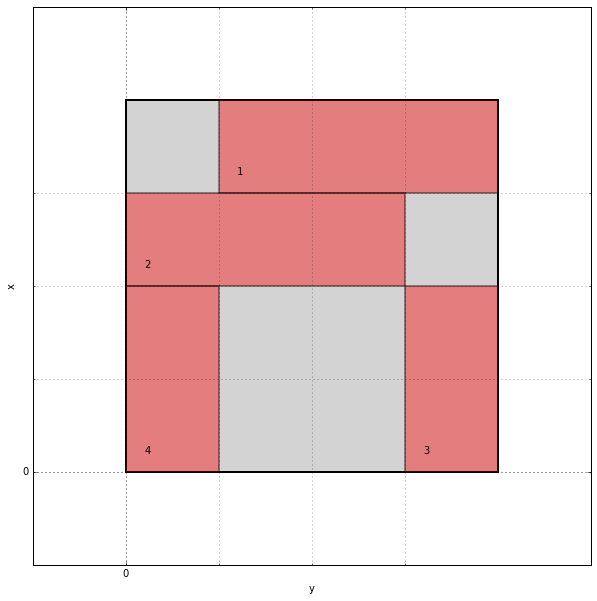

CPU times: user 228 ms, sys: 260 ms, total: 488 ms
Wall time: 218 ms


In [18]:
%%time
show_solution(*call("../data/bord", "-b 10"))

## Minimum 14
Voici le même exemple avec un contact minimum de 14 (qui est la valeur maximale)

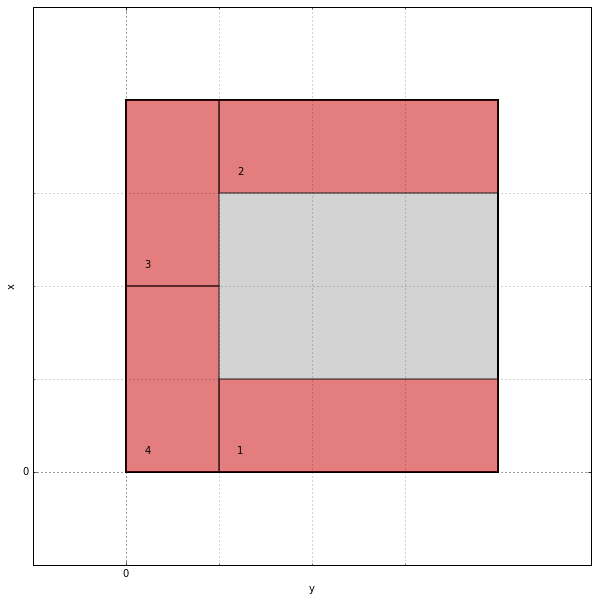

CPU times: user 230 ms, sys: 300 ms, total: 530 ms
Wall time: 208 ms


In [19]:
%%time
show_solution(*call("../data/bord", "-b 14"))

## Minimum 15
Voici le même exemple avec un contact minimum de 15

Comme on le voit ici, le programme ne trouve pas de solution

In [20]:
%%time
try:
    show_solution(*call("../data/bord", "-b 15"))
except subprocess.CalledProcessError:
    print("No solution foud\n")

No solution foud

CPU times: user 2.13 ms, sys: 5.88 ms, total: 8.01 ms
Wall time: 8.13 ms
